In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
train_df=pd.read_csv('/content/Titanic_train.csv')
test_df=pd.read_csv('/content/Titanic_test.csv')
df=pd.concat([train_df,test_df])

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
df.shape

(1309, 12)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# checking missing values in train data
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


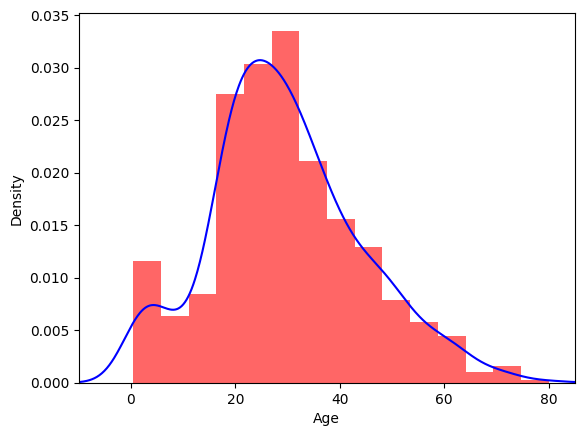

In [18]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
train_df["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [19]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))

The mean of "Age" is 29.70


In [20]:
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The median of "Age" is 28.00


Missing Values

In [21]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [22]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


<ipython-input-24-f5417cce123d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=train_df, palette='Set2')


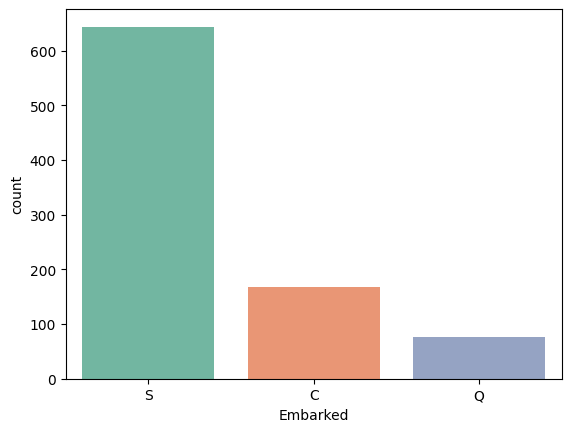

In [24]:
import seaborn as sns
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [25]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

<ipython-input-25-1c1ce5a730a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
<ipython-input-25-1c1ce5a730a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [26]:
#again checking for missing values
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


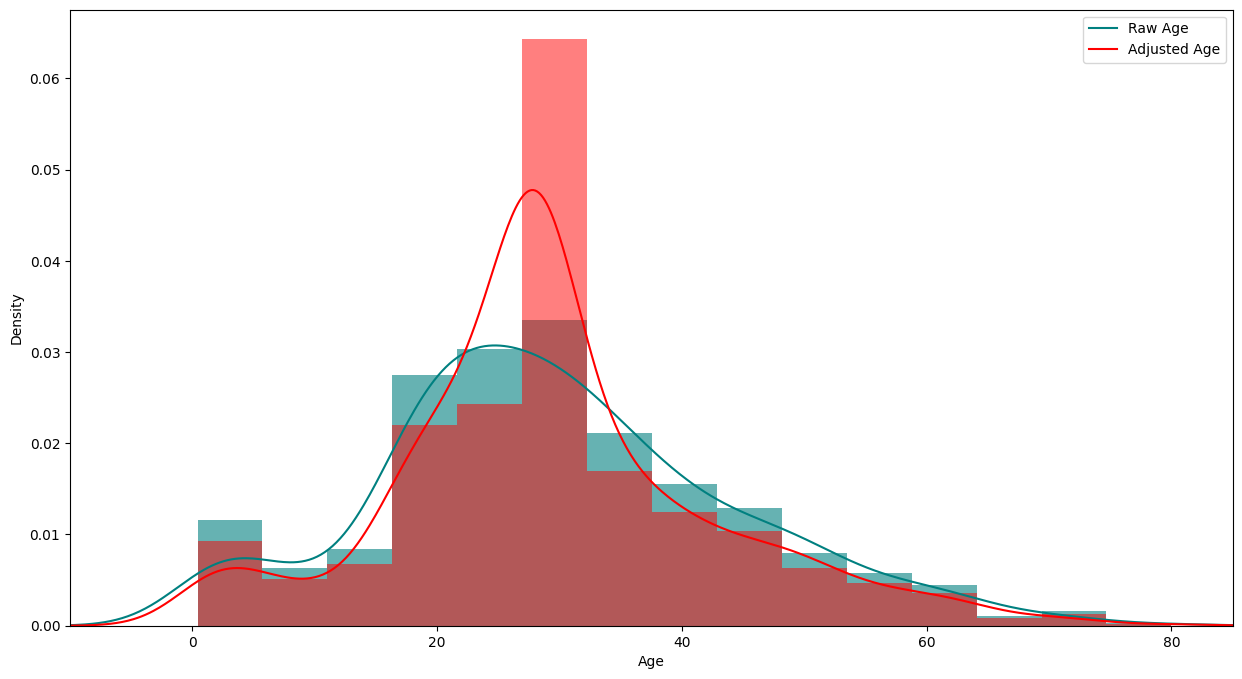

In [28]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.5)
train_data["Age"].plot(kind='density', color='red')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

EDA

<ipython-input-46-93dfa2eaffe5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_df["Age"][train_df.Survived == 1], color="darkturquoise", shade=True)
<ipython-input-46-93dfa2eaffe5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df["Age"][train_df.Survived == 0], color="lightcoral", shade=True)


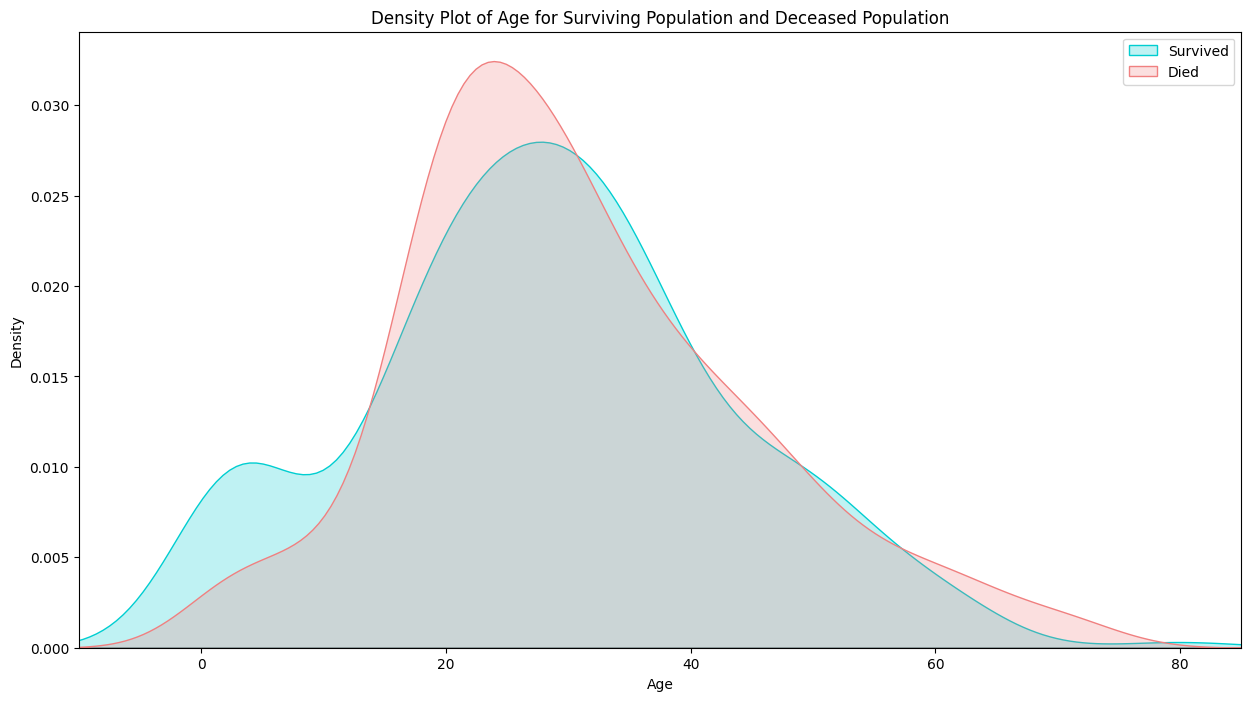

In [46]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_df["Age"][train_df.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_df["Age"][train_df.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

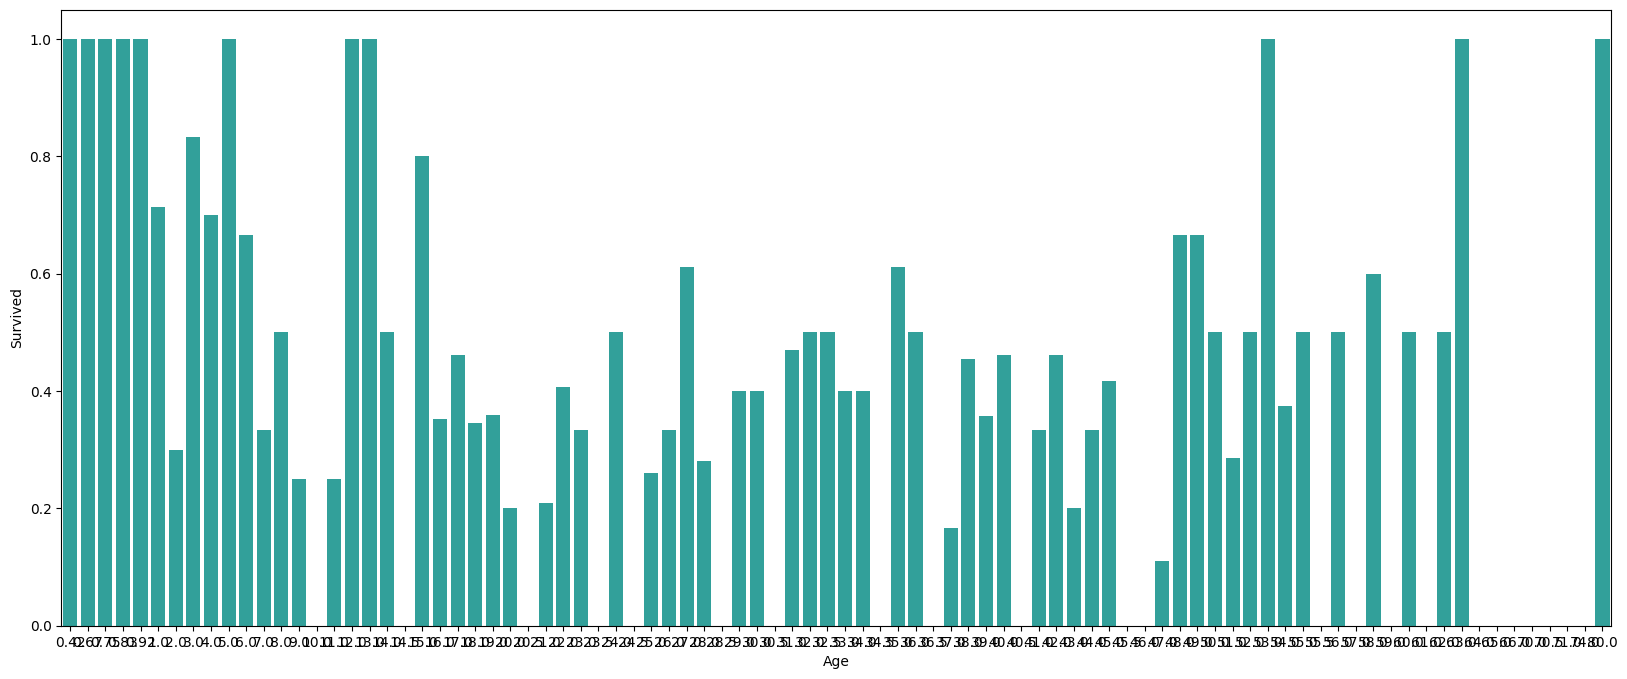

In [45]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Logistic Regreesion

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [50]:
cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X=train_df[cols]
y=train_df['Survived']

In [55]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [58]:
X_encoded_cleaned = X_encoded.dropna()

In [59]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X_encoded_cleaned, y[X_encoded_cleaned.index])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [60]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]


In [63]:
# Drop rows with missing values from X_encoded
X_encoded_cleaned = X_encoded.dropna()

In [64]:
# Align y with the cleaned X_encoded data
y_cleaned = y.loc[X_encoded_cleaned.index]

In [65]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_encoded_cleaned, y_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

In [69]:
import sklearn
print(sklearn.__version__)

1.5.2


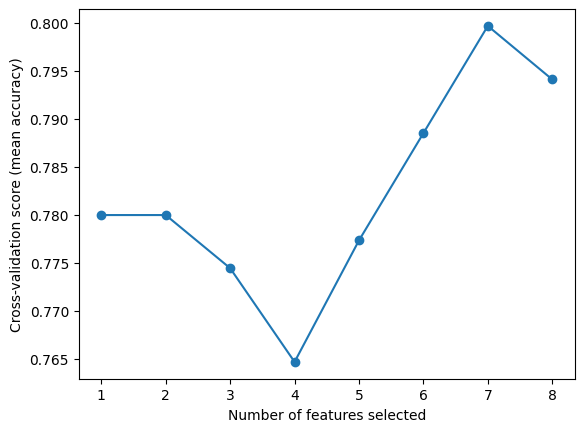

In [71]:
# Plotting the cross-validation scores
import matplotlib.pyplot as plt
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (mean accuracy)")
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.show()

In [76]:
Selected_features = X_encoded_cleaned.columns[rfecv.support_]
print(Selected_features)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [82]:
# One-hot encoding the categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [83]:
# correlation matrix
correlation_matrix = X_encoded.corr()

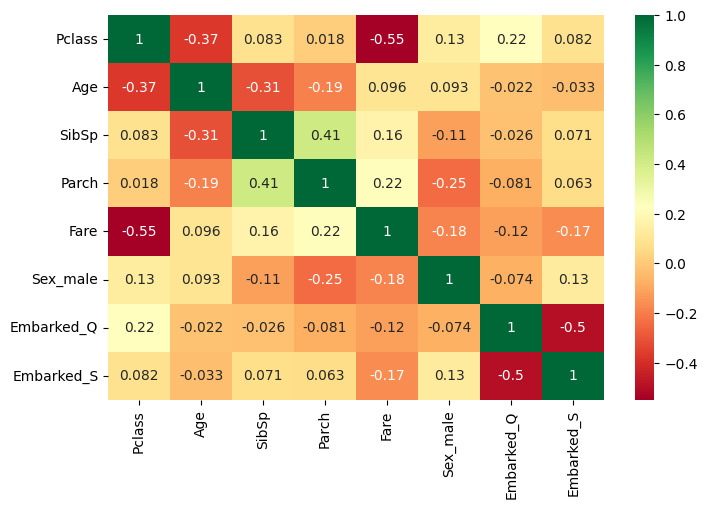

In [85]:
plt.subplots(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn")
plt.show()

Model Evaluation:

In [86]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [89]:
X_train= X_encoded_cleaned
y_train=y_cleaned

In [90]:
y_pred = rfecv.predict(X_train)

In [91]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='binary')
recall = recall_score(y_train, y_pred, average='binary')
f1 = f1_score(y_train, y_pred, average='binary')
roc_auc = roc_auc_score(y_train, rfecv.predict_proba(X_train)[:, 1])

In [92]:
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Model Performance:
Accuracy: 0.8053
Precision: 0.7828
Recall: 0.7207
F1-Score: 0.7504
ROC-AUC Score: 0.8610


ROC Curve

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [95]:
y_scores = rfecv.predict_proba(X_train)[:, 1]

In [97]:
# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [98]:
# Calculating AUC
roc_auc = auc(fpr, tpr)

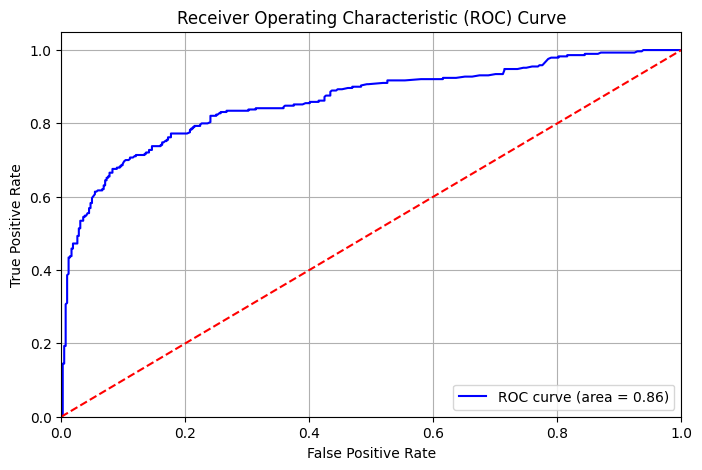

In [99]:
# Plotting the ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Interpretation

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
# Now accessing the coefficients
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

In [106]:
# Printing the coefficients and their odds ratios
for feature, coef, odds in zip(X_train.columns, coefficients, odds_ratios):
    print(f"{feature}: Coefficient = {coef:.4f}, Odds Ratio = {odds:.4f}")

Pclass: Coefficient = -1.1925, Odds Ratio = 0.3035
Age: Coefficient = -0.0426, Odds Ratio = 0.9582
SibSp: Coefficient = -0.3310, Odds Ratio = 0.7182
Parch: Coefficient = -0.0429, Odds Ratio = 0.9580
Fare: Coefficient = 0.0015, Odds Ratio = 1.0015
Sex_male: Coefficient = -2.4638, Odds Ratio = 0.0851
Embarked_Q: Coefficient = -0.4589, Odds Ratio = 0.6320
Embarked_S: Coefficient = -0.3145, Odds Ratio = 0.7301


#1. What is the difference between precision and recall?
Ans:-

-> Precision and recall are two evaluation metrics used to measure the performance of a classifier in binary and multiclass classification problems.

 -> Precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions.


#2. What is cross-validation, and why is it important in binary classification?
Ans:-

-> Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data.

->Cross-validation is used to assess the accuracy of a model. To evaluate the performance of any machine learning model, it must be tested on unseen data. Based on the performance of the unseen data, the model can be identified as either under-fit, over-fit, or well-fit.
